In [1]:
import tensorflow as tf
import numpy as np
import os

import cv2
import imghdr
from matplotlib import pyplot as plt

In [2]:
data = tf.keras.utils.image_dataset_from_directory('original_dataset_sepreate')

Found 1000 files belonging to 2 classes.


In [3]:
data_iterator = data.as_numpy_iterator()

In [4]:
batch = data_iterator.next()

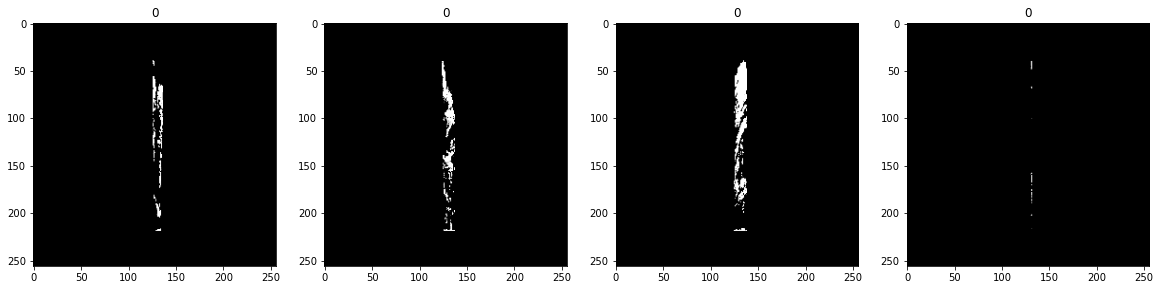

In [5]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [6]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [7]:
data = data.map(lambda x,y: (x/255, y))
data

<MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [8]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [9]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [10]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
test

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(4, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 4)         580       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 4)        0

In [17]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [18]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
22/22 [==============================] - 40s 2s/step - loss: 0.4160 - accuracy: 0.8281 - val_loss: 0.1830 - val_accuracy: 0.9323
Epoch 2/20
22/22 [==============================] - 36s 2s/step - loss: 0.1701 - accuracy: 0.9432 - val_loss: 0.0715 - val_accuracy: 0.9792
Epoch 3/20
22/22 [==============================] - 37s 2s/step - loss: 0.1024 - accuracy: 0.9673 - val_loss: 0.0775 - val_accuracy: 0.9688
Epoch 4/20
22/22 [==============================] - 36s 2s/step - loss: 0.0688 - accuracy: 0.9759 - val_loss: 0.0406 - val_accuracy: 0.9896
Epoch 5/20
22/22 [==============================] - 37s 2s/step - loss: 0.0631 - accuracy: 0.9815 - val_loss: 0.0249 - val_accuracy: 0.9948
Epoch 6/20
22/22 [==============================] - 39s 2s/step - loss: 0.0594 - accuracy: 0.9815 - val_loss: 0.0738 - val_accuracy: 0.9740
Epoch 7/20
22/22 [==============================] - 39s 2s/step - loss: 0.0417 - accuracy: 0.9844 - val_loss: 0.0418 - val_accuracy: 0.9896
Epoch 8/20
22/22 [==

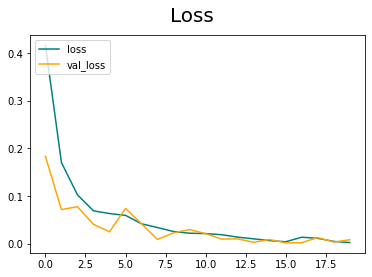

In [19]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

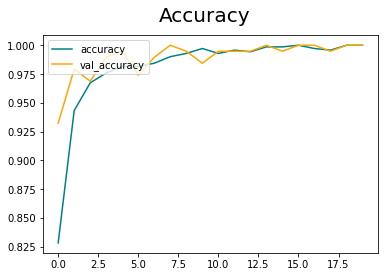

In [20]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [21]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [22]:
pre = Precision()
#success probability of making a correct positive class classification.
re = Recall()
# sensitive the model is towards identifying the positive class. It’s computed as the number of True Positives divided by the sum of True Positives and False Negatives.
acc = BinaryAccuracy()
# comfortable the model is with detecting the positive and negative classes.

In [23]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(pre.result(), re.result(), acc.result())

1/1 [==============================] - 0s 249ms/step
tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


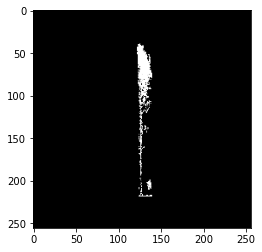

1/1 [==============================] - 0s 100ms/step
[[0.6113528]]
Prediction: tree


In [35]:
img = cv2.imread('FJI_AC_202.png')
re_size = tf.image.resize(img, (256,256))
plt.imshow(re_size.numpy().astype(int))
plt.show()
yhat = model.predict(np.expand_dims(re_size/255, 0))
print(yhat)
if yhat < 0.5: 
    print('Prediction: no tree')
else:
    print('Prediction: tree')


In [36]:
from tensorflow.keras.models import load_model

In [37]:
model.save(os.path.join('models','treeclassifier.h5'))

In [38]:
new_model = load_model(r'C:\Users\91896\Documents\projects\19_sept_hackathon\models\treeclassifier.h5')

In [45]:
from csv import writer
import cv2
folder_path = r'C:\Users\91896\Documents\projects\Tree-NoTree-Forecasting\unseen_dataset_1'
import os
from os import listdir


tree_values = 0
not_a_tree_values = 0 

# get the path/directory
folder_dir = folder_path
for images in os.listdir(folder_dir):
 
    # check if the image ends with png
    if (images.endswith(".png")):
        img = cv2.imread('C:\\Users\\91896\\Documents\\projects\\Tree-NoTree-Forecasting\\unseen_dataset_1\\'+images)
        
    re_size = tf.image.resize(img, (256,256))

    yhat = model.predict(np.expand_dims(re_size/255, 0))
    if yhat < 0.5:
        answer = "1"
        not_a_tree_values += 1
    else:
        answer = "0"
        tree_values += 1
        
    list_data=[images, answer]
    with open('CSVFILE1.csv', 'a', newline='') as f_object:
        writer_object = writer(f_object)
        writer_object.writerow(list_data)  
        f_object.close()
print("Tree count: ", tree_values)
print("Not a Tree count: ", not_a_tree_values)

1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 33ms/step
Tree count:  194
Not a Tree count:  6


In [46]:
import cv2
folder_path = r'C:\Users\91896\Documents\projects\Tree-NoTree-Forecasting\unseen_dataset_2'
import os
from os import listdir

tree_values = 0
not_a_tree_values = 0 


# get the path/directory
folder_dir = folder_path
for images in os.listdir(folder_dir):
 
    # check if the image ends with png
    if (images.endswith(".png")):
        img = cv2.imread('C:\\Users\\91896\\Documents\\projects\\Tree-NoTree-Forecasting\\unseen_dataset_2\\'+images)
        
    re_size = tf.image.resize(img, (256,256))

    yhat = model.predict(np.expand_dims(re_size/255, 0))
    if yhat < 0.5:
        answer = "1"
        not_a_tree_values += 1
    else:
        answer = "0"
        tree_values += 1
        
    list_data=[images, answer]
    with open('CSVFILE2.csv', 'a', newline='') as f_object:
        writer_object = writer(f_object)
        writer_object.writerow(list_data)  
        f_object.close()
        
print("Tree count: ", tree_values)
print("Not a Tree count: ", not_a_tree_values)

1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 33ms/step
Tree count:  17
Not a Tree count:  183


In [48]:
accuracy = 100 - 5.75
accuracy

94.25